In [1]:
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
labels = ['PNEUMONIA', 'NORMAL','COVID','TUBERCULOSIS']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                new_img = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(new_img,(img_size,img_size))
                data.append([resized_img,class_num])
            except:
                continue
    return np.array(data)      
    

In [3]:
train = get_data('C:/Final Year Project/X-Ray Images/train')
test = get_data('C:/Final Year Project/X-Ray Images/test')


C:\Users\sajid\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [4]:
X_train = []
y_train = []

X_test = []
y_test = []



for img,label in train:
    X_train.append(img)
    y_train.append(label)

for img,label in test:
    X_test.append(img)
    y_test.append(label)


In [5]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255


X_train = X_train.reshape(-1,img_size,img_size,1)
X_test = X_test.reshape(-1,img_size,img_size,1)


y_train = np.array(y_train)
y_test = np.array(y_test)


In [6]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [7]:
model = Sequential()

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (img_size,img_size,1)))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))


model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))

model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.3))

model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 4 , activation = 'softmax'))

model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 128)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 256)      

In [8]:
history = model.fit(datagen.flow(X_train,y_train,batch_size=25),epochs=5,validation_data=datagen.flow(X_test,y_test))

Epoch 1/5
440/440 [==============================] - 2092s 5s/step - loss: 0.7367 - accuracy: 0.7223 - val_loss: 0.7614 - val_accuracy: 0.7844
Epoch 2/5
440/440 [==============================] - 2022s 5s/step - loss: 0.4449 - accuracy: 0.8302 - val_loss: 0.4770 - val_accuracy: 0.8200
Epoch 3/5
440/440 [==============================] - 2016s 5s/step - loss: 0.3719 - accuracy: 0.8612 - val_loss: 0.4859 - val_accuracy: 0.8590
Epoch 4/5
440/440 [==============================] - 2015s 5s/step - loss: 0.3440 - accuracy: 0.8720 - val_loss: 0.6399 - val_accuracy: 0.8674
Epoch 5/5
440/440 [==============================] - 2018s 5s/step - loss: 0.3090 - accuracy: 0.8847 - val_loss: 0.3989 - val_accuracy: 0.8590


In [9]:
model.evaluate(X_test,y_test)

1433/1433 [==============================] - 70s 49ms/step


[0.31876302089877506, 0.9050942063331604]

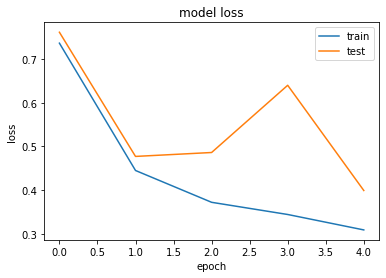

In [10]:
# plotting training set and validation test 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

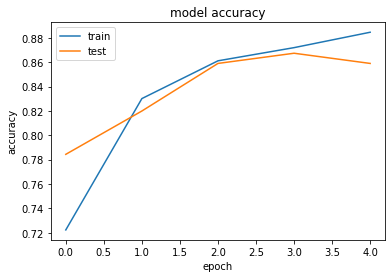

In [11]:
# plotting training set and validation test 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)','Covid (Class 2)','Tuberculosis (Class 3)']))

                        precision    recall  f1-score   support

   Pneumonia (Class 0)       0.88      0.95      0.91       390
      Normal (Class 1)       0.83      0.86      0.85       234
       Covid (Class 2)       0.94      0.87      0.90       409
Tuberculosis (Class 3)       0.95      0.92      0.94       400

              accuracy                           0.91      1433
             macro avg       0.90      0.90      0.90      1433
          weighted avg       0.91      0.91      0.91      1433



In [13]:
cm = confusion_matrix(y_test,predictions)
cm

array([[372,  18,   0,   0],
       [ 33, 201,   0,   0],
       [ 12,  22, 355,  20],
       [  8,   0,  23, 369]], dtype=int64)

<AxesSubplot:>

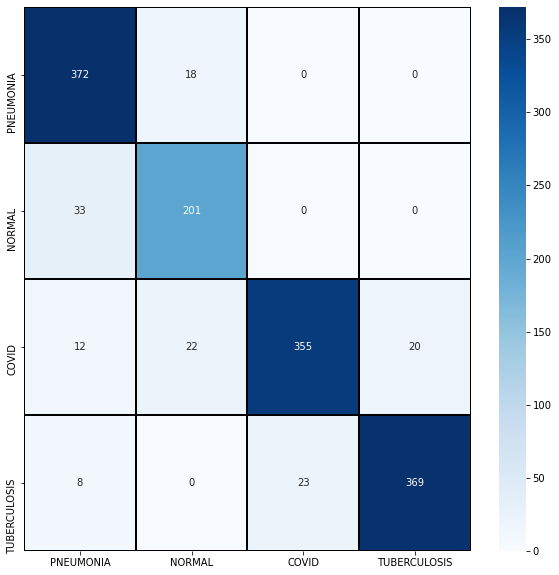

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)